# Paper: Time-optimal control strategies in SIR epidemic models

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import genfromtxt

# Vaccination

In [15]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
taos = np.linspace(0,3, 100) #0.1 step size 
us = np.linspace(0,3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u * (t > tao) * S  
    dIdt = beta * S * I - mu * I 
    return dSdt, dIdt


for u in us:
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

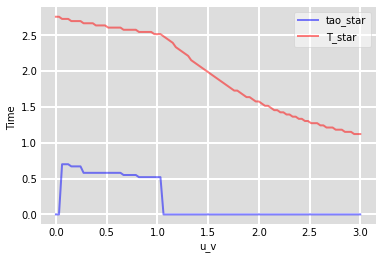

In [16]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [17]:
#save to csv file
a = np.asarray([t, tao_star_list, T_star_list, us]) 
#np.savetxt("vacc_tao_data.csv", a, delimiter=",")

In [19]:
# Find corresponding tao for u = 0.5

vacc_tao_data = genfromtxt('tao_data.csv', delimiter=',') #[t, tao_star_list, T_star_list, us]

for i in range(len(vacc_tao_data[3])):
    if vacc_tao_data[3][i] >= 0.5:
        print('closest u to 0.5 is: ' , vacc_tao_data[3][i])
        print('corresponding tao for that u is: ', vacc_tao_data[1][i])
        break


closest u to 0.5 is:  0.5151515151515151
corresponding tao for that u is:  0.58


# Isolation 

In [2]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.005, 5
# A grid of time points (in days)
t = np.linspace(0, 12, 100) 
taos = np.linspace(0, 12, 100) #0.1 step size 
us = np.linspace(0, 12, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I   
    dIdt = beta * S * I - mu * I - u * (t > tao) * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

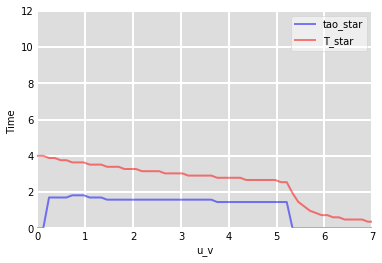

In [3]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0,7])
ax.set_ylim([0,12])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [4]:
#save to csv file
a = np.asarray([t, tao_star_list, T_star_list, us]) 
#np.savetxt("iso_tao_data.csv", a, delimiter=",")

In [20]:
# Find corresponding tao for u = 2

iso_tao_data = genfromtxt('iso_tao_data.csv', delimiter=',') #[t, tao_star_list, T_star_list, us]

for i in range(len(iso_tao_data[3])):
    if iso_tao_data[3][i] >= 2:
        print('closest u to 2 is: ' , iso_tao_data[3][i])
        print('corresponding tao for that u is: ', iso_tao_data[1][i])
        break


closest u to 2 is:  2.0606060606060606
corresponding tao for that u is:  1.58


# Culling

In [8]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.0075, 5
# A grid of time points (in days)
t = np.linspace(0, 3, 100) 
taos = np.linspace(0, 3, 100) #0.1 step size 
us = np.linspace(0, 3, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t > tao) * S
    dIdt = beta * S * I - mu * I - u *(t > tao) * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

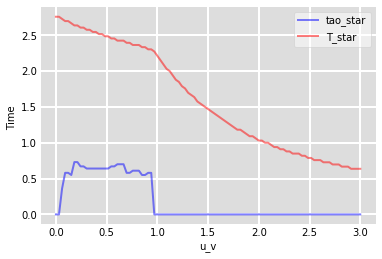

In [9]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.set_xlim([0,7])
#ax.set_ylim([0,12])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [10]:
#save to csv file
a = np.asarray([t, tao_star_list, T_star_list, us]) 
#np.savetxt("cul_tao_data.csv", a, delimiter=",")

In [21]:
# Find corresponding tao for u = 0.5

cul_tao_data = genfromtxt('cul_tao_data.csv', delimiter=',') #[t, tao_star_list, T_star_list, us]

for i in range(len(cul_tao_data[3])):
    if cul_tao_data[3][i] >= 0.5:
        print('closest u to 0.5 is: ' , cul_tao_data[3][i])
        print('corresponding tao for that u is: ', cul_tao_data[1][i])
        break


closest u to 0.5 is:  0.5151515151515151
corresponding tao for that u is:  0.64


# Reduction

In [11]:
tao_star_list = []
T_star_list = []
T_list = []
tao_list = []

# Initial number of infected individuals, I0
I0 = 1
# Initial number of susceptible individuals, S0
S0 = 2000
# Contact rate, beta, and mean recovery rate, mu.
beta, mu = 0.005, 5
# A grid of time points (in days)
t = np.linspace(0, 20, 100) 
taos = np.linspace(0, 20, 100) #0.1 step size 
us = np.linspace(0, 20, 100) #0.1 step size 

epsilon = 0.5

# The SIR model differential equations.
def deriv(y, t, beta, mu, u, tao):
    S, I = y
    dSdt = -beta * S * I - u *(t > tao) * beta * S * I
    dIdt = beta * S * I - mu * I - u *(t > tao) * beta * S * I
    return dSdt, dIdt

count = 0
for u in us:
    #print(f'{count} out of 100')
    count+=1
    for tao in taos:
        # Initial conditions vector
        y0 = S0, I0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(beta, mu, u, tao))
        S, I = ret.T

        #Ti is 1st time when I<epsilon
        Ti_idx = np.where(I<epsilon)[0][0]
        T_list.append(t[Ti_idx])
        tao_list.append(tao)

    #T_min = minimum over all of the 1st times where I<epsilon 
    T_min = min(T_list)
    idx = T_list.index(T_min) #get the index in order to find the corresponding tao
    T_star_list.append(T_min)
    #tao_star is the corresponding tao for the T_min 
    tao_star = tao_list[idx]
    tao_star_list.append(round(tao_star,2))

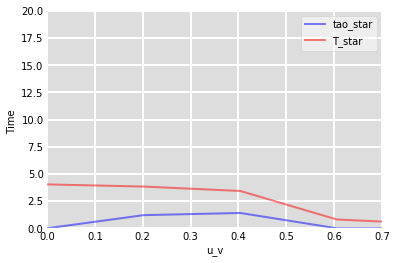

In [12]:
# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, tao_star_list, 'b', alpha=0.5, lw=2, label='tao_star')
ax.plot(t, T_star_list, 'r', alpha=0.5, lw=2, label='T_star')
ax.set_xlabel('u_v')
ax.set_ylabel('Time ')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlim([0,0.7])
ax.set_ylim([0,20])
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [13]:
#save to csv file
a = np.asarray([t, tao_star_list, T_star_list, us]) 
#np.savetxt("red_tao_data.csv", a, delimiter=",")

In [22]:
# Find corresponding tao for u = 0.3

red_tao_data = genfromtxt('red_tao_data.csv', delimiter=',') #[t, tao_star_list, T_star_list, us]

for i in range(len(red_tao_data[3])):
    if red_tao_data[3][i] >= 0.3:
        print('closest u to 0.3 is: ' , red_tao_data[3][i])
        print('corresponding tao for that u is: ', red_tao_data[1][i])
        break


closest u to 0.3 is:  0.40404040404040403
corresponding tao for that u is:  1.41
